In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
glassdoor_data = pd.read_csv('glassdoor_data.csv')

In [ ]:
glassdoor_data.head()

,Positions,Estimated_Salary,L_Job_Description,Rating,Company_name,Location,Headquarters,Size,Founded,Type of ownership,...,Age_of_company,State,City,job_loc,Comp_Name,Python,R_Studio,AWS,Spark,Excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,NM,Albuquerque,0,Tecolote Research\n,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,MD,Linthicum,0,University of Maryland Medical System\n,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,FL,Clearwater,1,KnowBe4\n,1,1,0,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,WA,Richland,1,PNNL\n,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,NY,New York,1,Affinity Solutions\n,1,0,0,0,1


In [ ]:
glassdoor_data.columns

Index(['Positions', 'Estimated_Salary', 'L_Job_Description', 'Rating',
       'Company_name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors_Number', 'Hourly', 'Employer_provided', 'minimum_income',
       'maximum_income', 'average_income', 'Age_of_company', 'State', 'City',
       'job_loc', 'Comp_Name', 'Python', 'R_Studio', 'AWS', 'Spark', 'Excel'],
      dtype='object')

In [ ]:
glassdoor_data['new_minimum_salary'] = np.where(glassdoor_data['Hourly']== 1, glassdoor_data['minimum_income']*40*52, glassdoor_data['minimum_income']*1000)
glassdoor_data['new_maximum_salary'] = np.where(glassdoor_data['Hourly']== 1, glassdoor_data['maximum_income']*40*52, glassdoor_data['maximum_income']*1000)
glassdoor_data['average_income'] = np.where(glassdoor_data['Hourly']== 1, round(glassdoor_data['average_income']*40*52,2), glassdoor_data['average_income']*1000)





In [ ]:
def extract_designation(Position):
    if Position.lower().find('director')>-1:
        return 'Director'
    elif Position.lower().find('data scientist')>-1 or (Position.lower().find('scientist')>-1 & Position.lower().find('data science')>-1):
        return 'Data Scientist'
    elif Position.lower().find('data engineer')>-1:
        return 'Data Engineer'
    elif Position.lower().find('data analyst')>-1:
        return 'Data Analyst'
    elif Position.lower().find('machine learning')>-1:
        return 'Machine Learning Engineer'
    elif Position.lower().find('manager')>-1:
        return 'Manager'
    else:
        return 'Other'

[Text(0, 0, 'Data Scientist'),
 Text(1, 0, 'Other'),
 Text(2, 0, 'Data Engineer'),
 Text(3, 0, 'Data Analyst'),
 Text(4, 0, 'Manager'),
 Text(5, 0, 'Machine Learning Engineer'),
 Text(6, 0, 'Director')]

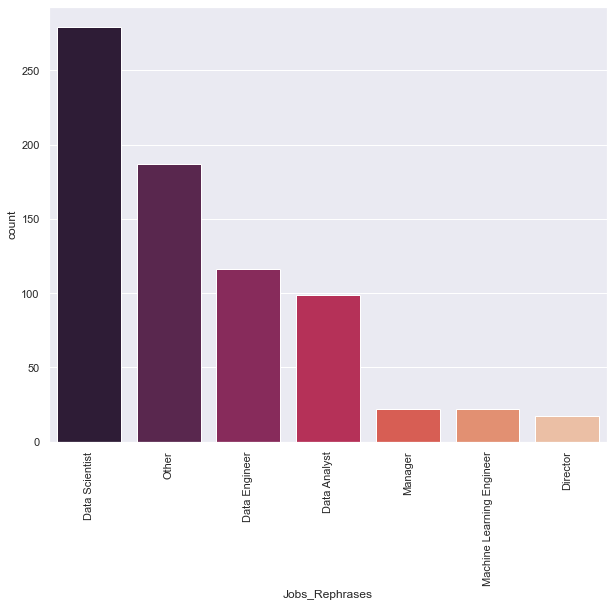

In [ ]:
plot_designation=sns.countplot(data=glassdoor_data, x='Jobs_Rephrases', order=glassdoor_data.Jobs_Rephrases.value_counts().index,palette='rocket')
plot_designation.set_xticklabels(plot_designation.get_xticklabels(),rotation = 90)


In [ ]:
#Min, Max, Average salary of the employees
pd.pivot_table(glassdoor_data, index = 'Jobs_Rephrases', values = 'average_income', aggfunc={'average_income':[min,max,np.mean]})



,max,mean,min
Jobs_Rephrases,,,
Data Analyst,138500.0,64915.757576,28080.0
Data Engineer,205000.0,104133.620690,58500.0
Data Scientist,237500.0,117564.516129,15500.0
Director,254000.0,166117.647059,53000.0
Machine Learning Engineer,232500.0,126431.818182,87000.0
Manager,221500.0,84022.727273,40500.0
Other,174000.0,88512.513369,39500.0


In [ ]:
pd.pivot_table(glassdoor_data, index = ['State','Jobs_Rephrases'], values = 'average_income',sort=True)

average_income
State        Jobs_Rephrases                           
 AL          Data Analyst                 60750.000000
             Data Engineer                65000.000000
             Other                        51833.333333
 AZ          Data Analyst                 55000.000000
             Data Engineer                79500.000000
             Data Scientist               69500.000000
             Other                       124500.000000
 CA          Data Analyst                 85250.000000
             Data Engineer               129540.000000
             Data Scientist              143044.776119
             Machine Learning Engineer   177300.000000
             Manager                      80611.111111
             Other                        99907.407407
 CO          Data Analyst                 29500.000000
             Data Engineer                99000.000000
             Data Scientist              108666.666667
             Machine Learning Engineer   100500.000000
             Other                        65520.000000
 CT          Data Scientist               84000.000000
             Other                        62500.000000
 DC          Data Analyst                 63500.000000
             Data Engineer                85000.000000
             Data Scientist              149000.000000
 DE          Other                        57200.000000
 FL          Data Analyst                 47500.000000
             Data Engineer                91833.333333
             Data Scientist               97357.142857
 GA          Data Scientist               81333.333333
             Other                        80000.000000
 IA          Data Analyst                 43000.000000
             Data Engineer               102833.333333
 ID          Data Analyst                 56250.000000
 IL          Data Analyst                 66500.000000
             Data Engineer                96125.000000
             Data Scientist              117233.333333
             Director                    221750.000000
             Machine Learning Engineer   133000.000000
             Other                        57166.666667
 IN          Data Engineer               114500.000000
             Data Scientist               84500.000000
             Other                        69000.000000
 KS          Machine Learning Engineer    87000.000000
 KY          Data Scientist               84000.000000
             Other                       103500.000000
 LA          Data Analyst                 48000.000000
             Data Engineer                70500.000000
             Other                        41600.000000
 Los Angeles Data Scientist              107500.000000
 MA          Data Analyst                 59125.000000
             Data Engineer                91555.555556
             Data Scientist              113750.000000
             Director                    130055.555556
             Manager                      71900.000000
             Other                       110213.478261
 MD          Data Analyst                 80666.666667
             Data Engineer               109000.000000
             Data Scientist              109115.384615
             Other                        88750.000000
 MI          Data Scientist              106625.000000
             Manager                      87500.000000
 MN          Data Analyst                 76000.000000
             Data Engineer                95000.000000
 MO          Data Analyst                 61000.000000
             Data Scientist              127666.666667
             Manager                      40500.000000
             Other                        72333.333333
 NC          Data Engineer               104250.000000
             Data Scientist              117000.000000
             Other                        90916.666667
 NE          Other                        54500.000000
 NJ          Data Analyst                 65700.000000
             Data Enginee

<AxesSubplot:>

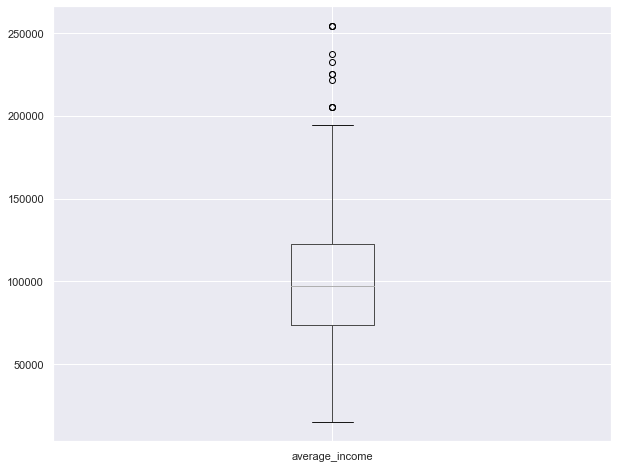

In [ ]:
glassdoor_data.boxplot(column = ['average_income'])

<AxesSubplot:>

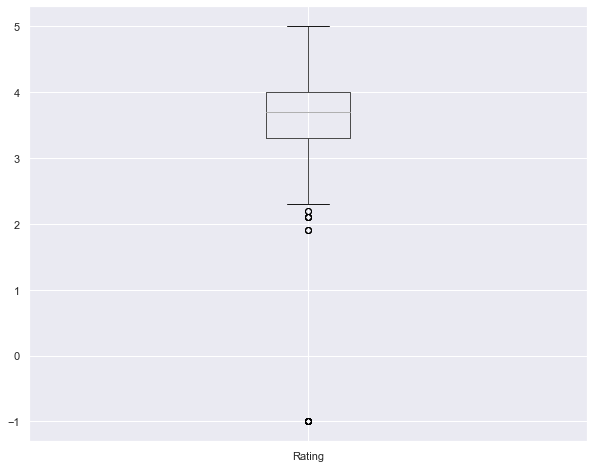

In [ ]:
glassdoor_data.boxplot(column = ['Rating'])

In [ ]:
glassdoor_data['Rating'] = glassdoor_data['Rating'].apply(lambda rating : np.NaN if rating==-1 else rating)
rating_df = glassdoor_data[['Rating','average_income']]
rating_data= pd.pivot_table(rating_df, index = ['Rating'], values = 'average_income',sort=True)
rating_data.sort_values(('Rating'),ascending=False)
rating_data

,average_income
Rating,
1.9,87500.000000
2.1,95900.000000
2.2,97750.000000
2.3,81500.000000
2.4,60214.285714
2.5,120000.000000
2.6,109083.333333
2.7,85332.857143
2.8,83928.571429


Text(0, 0.5, 'salary')

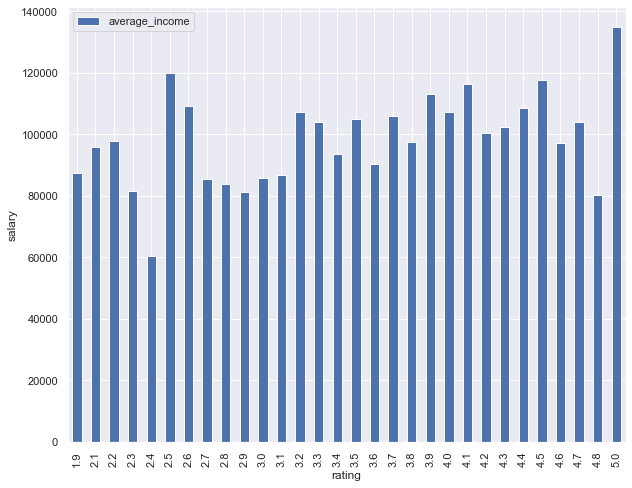

In [ ]:
rating_data_comp = rating_data.reset_index()
rating_data_comp
ratings_plot=rating_data_comp.plot.bar(x='Rating', y='average_income')
ratings_plot.set_xlabel("rating")
ratings_plot.set_ylabel("salary")



In [ ]:
#Industries offering more data scientist jobs 
glassdoor_data.loc[glassdoor_data['Jobs_Rephrases']=='Data Scientist',['Industry']].value_counts()

Industry                               
Biotech & Pharmaceuticals                  34
Enterprise Software & Network Solutions    25
IT Services                                22
Computer Hardware & Software               21
Insurance Carriers                         20
Consulting                                 16
Advertising & Marketing                    14
Aerospace & Defense                        13
Energy                                     12
Financial Analytics & Research              8
Health Care Services & Hospitals            6
Insurance Agencies & Brokerages             6
Real Estate                                 6
Internet                                    6
Banks & Credit Unions                       5
Federal Agencies                            5
Research & Development                      4
Investment Banking & Asset Management       4
Logistics & Supply Chain                    4
Telecommunications Services                 4
Staffing & Outsourcing                  

In [ ]:
ownership = glassdoor_data[['Type of ownership','average_income']]

In [ ]:
ownership.groupby(['Type of ownership'])['average_income'].mean()

Type of ownership
-1                                117500.000000
College / University              107615.384615
Company - Private                 102083.707317
Company - Public                  111044.870466
Government                         85740.000000
Hospital                           66996.000000
Nonprofit Organization             73308.727273
Other Organization                 77500.000000
School / School District           77750.000000
Subsidiary or Business Segment    110573.529412
Unknown                            39500.000000
Name: average_income, dtype: float64

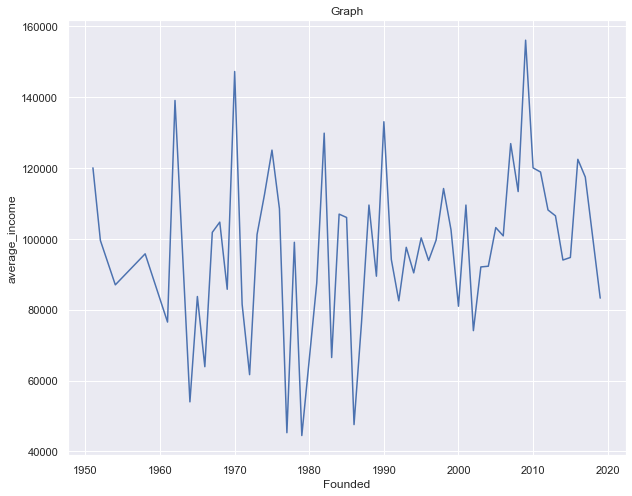

In [ ]:
glassdoor_data['Founded'] = glassdoor_data['Founded'].apply(lambda founded : np.NaN if founded==-1 else founded)
founded = glassdoor_data[['Founded','average_income']]
founded_sal= founded.groupby(['Founded'])['average_income'].mean()
new = pd.DataFrame({'Founded':founded_sal.index, 'average_income':founded_sal.values})
new = new[new['Founded']>1950]
plt.plot(new['Founded'],new['average_income'])
plt.title('Graph')
plt.xlabel('Founded')
plt.ylabel('average_income')
plt.show()

In [ ]:
glassdoor_data.loc[glassdoor_data['Jobs_Rephrases']=='Data Scientist',['Founded']].value_counts()

Founded
2012.0     14
2010.0     13
1965.0     12
2011.0     12
2008.0     12
1958.0      9
1996.0      9
2006.0      8
2007.0      6
1968.0      6
2009.0      6
1913.0      6
1984.0      6
1997.0      6
1849.0      6
2013.0      5
1999.0      5
2016.0      5
2005.0      5
2017.0      5
1939.0      5
1976.0      4
1870.0      4
2000.0      4
1982.0      4
1969.0      4
1948.0      4
1995.0      4
2003.0      3
1992.0      3
1993.0      3
1943.0      3
1935.0      3
1925.0      3
1885.0      3
2014.0      3
1863.0      3
1981.0      3
1974.0      2
1978.0      2
1781.0      2
1970.0      2
1966.0      2
2002.0      2
1952.0      2
1951.0      2
1912.0      2
2015.0      2
1852.0      2
1851.0      2
1962.0      2
2004.0      1
1744.0      1
2001.0      1
1998.0      1
1994.0      1
1989.0      1
1987.0      1
1973.0      1
1967.0      1
1942.0      1
1937.0      1
1915.0      1
1887.0      1
1878.0      1
1860.0      1
1850.0      1
1812.0      1
2019.0      1
dtype: int64

In [ ]:
company_df = glassdoor_data.loc[glassdoor_data['Jobs_Rephrases']=='Data Scientist',['Company_name','average_income']]
company_df['Company_Name']=company_df['Company_name'].apply(lambda x: x.split('\n')[0])
company_df= company_df.groupby(['Company_Name'])['average_income'].mean()
new_company_df = pd.DataFrame({'Company_Name':company_df.index, 'average_income':company_df.values})
sorted_company=new_company_df.sort_values('average_income',ascending=False)
sorted_company


,Company_Name,average_income
57,Gallup,237500.000000
26,CA-One Tech Cloud,225000.000000
132,The Climate Corporation,194000.000000
141,Two Sigma,172000.000000
149,Western Digital,171500.000000
28,CK-12 Foundation,169000.000000
39,Confluent,168000.000000
58,Genentech,167000.000000
105,Quartet Health,165000.000000
113,Samba TV,164500.000000


[Text(0, 0, 'Gallup'),
 Text(1, 0, 'CA-One Tech Cloud'),
 Text(2, 0, 'The Climate Corporation'),
 Text(3, 0, 'Two Sigma'),
 Text(4, 0, 'Western Digital'),
 Text(5, 0, 'CK-12 Foundation'),
 Text(6, 0, 'Confluent'),
 Text(7, 0, 'Genentech'),
 Text(8, 0, 'Quartet Health'),
 Text(9, 0, 'Samba TV')]

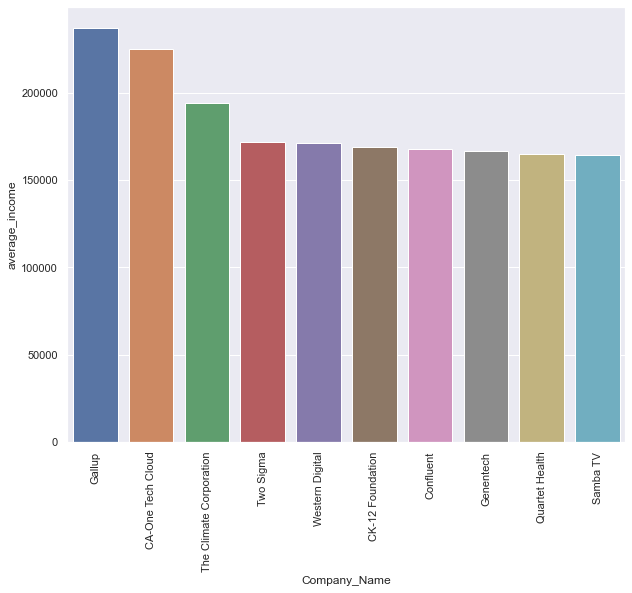

In [ ]:
plot=sns.barplot(x = sorted_company['Company_Name'][0:10],
            y = sorted_company['average_income'][0:10],
            data = sorted_company
            )
plot.set_xticklabels(labels=sorted_company['Company_Name'][0:10],rotation=90)

[Text(0, 0, 'PNNL'),
 Text(1, 0, 'AstraZeneca'),
 Text(2, 0, 'Pfizer'),
 Text(3, 0, 'Novartis'),
 Text(4, 0, 'MITRE'),
 Text(5, 0, 'Nuna'),
 Text(6, 0, 'Zest AI'),
 Text(7, 0, 'Juniper Networks'),
 Text(8, 0, 'Novetta'),
 Text(9, 0, 'Sartorius'),
 Text(10, 0, 'h2o.ai'),
 Text(11, 0, 'Maven Wave Partners'),
 Text(12, 0, 'Northrop Grumman'),
 Text(13, 0, 'TransUnion'),
 Text(14, 0, 'Recursion Pharmaceuticals')]

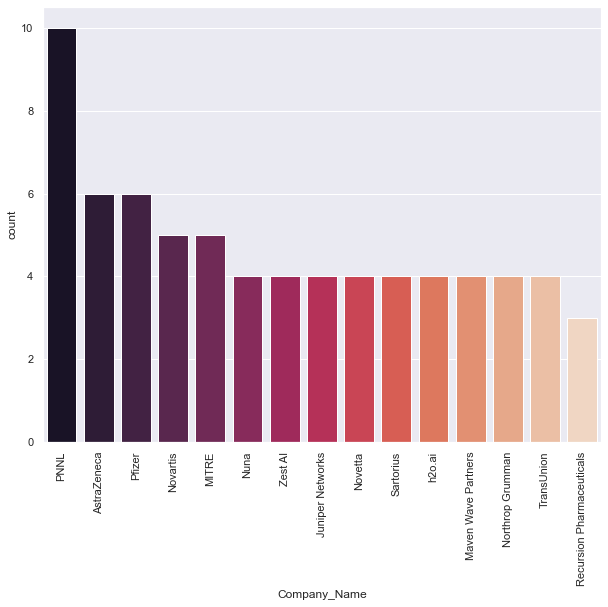

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
name_of_company = glassdoor_data.loc[glassdoor_data['Jobs_Rephrases']=='Data Scientist',['Company_name']]
name_of_company['Company_Name']=name_of_company['Company_name'].apply(lambda x: x.split('\n')[0])
sns.color_palette("Greys")
plot_company=sns.countplot(data=name_of_company, x='Company_Name', order=name_of_company.Company_Name.value_counts().nlargest(15).index,palette='rocket')
plot_company.set_xticklabels(plot_company.get_xticklabels(),rotation = 90)

[Text(0, 0, ' CA'),
 Text(1, 0, ' MA'),
 Text(2, 0, ' NY'),
 Text(3, 0, ' MD'),
 Text(4, 0, ' IL'),
 Text(5, 0, ' TX'),
 Text(6, 0, ' PA'),
 Text(7, 0, ' WA'),
 Text(8, 0, ' VA'),
 Text(9, 0, ' NC'),
 Text(10, 0, ' OH'),
 Text(11, 0, ' FL'),
 Text(12, 0, ' WI'),
 Text(13, 0, ' KY'),
 Text(14, 0, ' GA'),
 Text(15, 0, ' DE'),
 Text(16, 0, ' CO'),
 Text(17, 0, ' NJ'),
 Text(18, 0, ' DC'),
 Text(19, 0, ' MI'),
 Text(20, 0, ' MO'),
 Text(21, 0, ' NE'),
 Text(22, 0, ' UT'),
 Text(23, 0, ' NM'),
 Text(24, 0, ' OR'),
 Text(25, 0, ' IN'),
 Text(26, 0, ' CT'),
 Text(27, 0, ' Los Angeles'),
 Text(28, 0, ' AL'),
 Text(29, 0, ' LA'),
 Text(30, 0, ' TN'),
 Text(31, 0, ' SC'),
 Text(32, 0, ' AZ')]

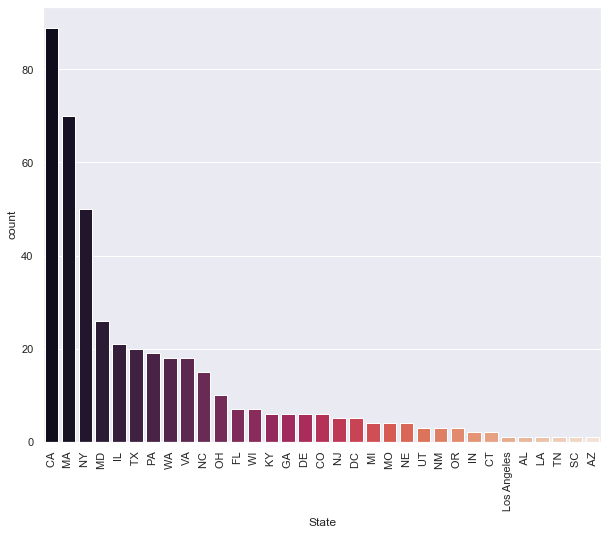

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
state_df = glassdoor_data.loc[glassdoor_data['Jobs_Rephrases']=='Data Scientist',['State']]
plot_state=sns.countplot(data=state_df, x='State', order=state_df.State.value_counts().index,palette='rocket')
plot_state.set_xticklabels(plot_state.get_xticklabels(),rotation = 90)


In [ ]:
glassdoor_data['Size'] = glassdoor_data['Size'].apply(lambda Size : 'Unknown' if Size=='-1'or Size=='Unknown'  else Size)
glassdoor_data['Size'] = glassdoor_data['Size'].apply(lambda x: x.replace(' employees',''))
size_df = glassdoor_data[['Size','average_income']]
size_sal= size_df.groupby(['Size'])['average_income'].mean()
size_sal

Size
1 to 50          105076.129032
10000+           112812.307692
1001 to 5000      94723.866667
201 to 500       100247.863248
5001 to 10000     97518.947368
501 to 1000       91515.373134
51 to 200        111776.170213
Unknown          127050.000000
Name: average_income, dtype: float64

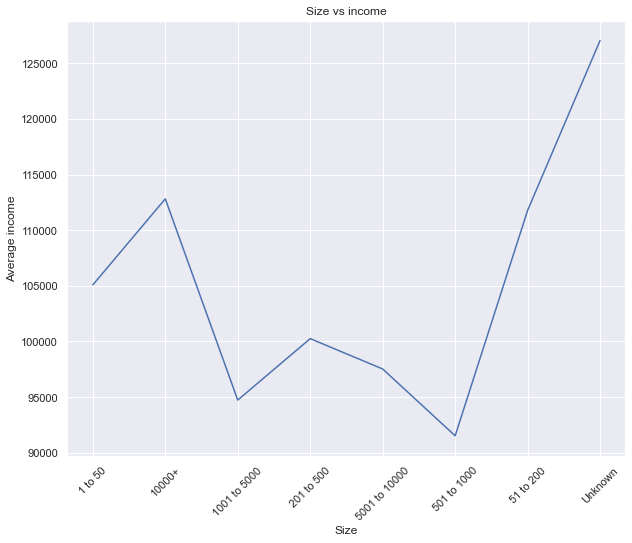

In [ ]:
size_new_df = pd.DataFrame({'Size':size_sal.index, 'average_income':size_sal.values})
plt.plot(size_new_df['Size'],size_new_df['average_income'])
plt.title('Line Graph')
plt.xlabel('Size')
plt.ylabel('average_income')
plt.plot()
plt.xlabel("Size")
plt.ylabel("Average income")
plt.title("Size vs income")
plt.xticks(rotation = 45)
plt.show()

[Text(0, 0, 'Information Technology'),
 Text(1, 0, 'Business Services'),
 Text(2, 0, 'Biotech & Pharmaceuticals'),
 Text(3, 0, 'Insurance'),
 Text(4, 0, 'Finance'),
 Text(5, 0, 'Aerospace & Defense'),
 Text(6, 0, 'Oil, Gas, Energy & Utilities'),
 Text(7, 0, 'Education'),
 Text(8, 0, 'Real Estate'),
 Text(9, 0, 'Retail'),
 Text(10, 0, 'Health Care'),
 Text(11, 0, 'Government'),
 Text(12, 0, 'Manufacturing'),
 Text(13, 0, 'Telecommunications'),
 Text(14, 0, 'Transportation & Logistics'),
 Text(15, 0, 'Mining & Metals'),
 Text(16, 0, 'Travel & Tourism'),
 Text(17, 0, 'Consumer Services'),
 Text(18, 0, 'Media'),
 Text(19, 0, 'Agriculture & Forestry'),
 Text(20, 0, 'Accounting & Legal'),
 Text(21, 0, 'Unknown')]

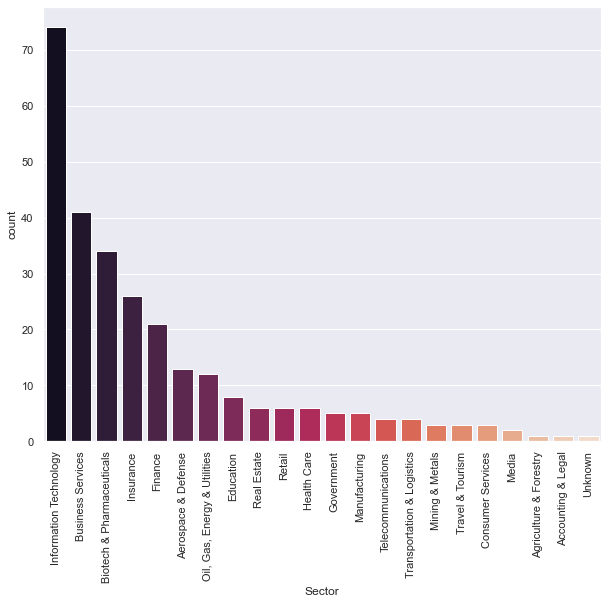

In [ ]:
glassdoor_data['Sector'] = glassdoor_data['Sector'].apply(lambda Sector : 'Unknown' if Sector=='-1'or Sector=='Unknown'  else Sector)
sector_count_df = glassdoor_data.loc[glassdoor_data['Jobs_Rephrases']=='Data Scientist',['Sector']]
plot_sector=sns.countplot(data=sector_count_df, x='Sector', order=sector_count_df.Sector.value_counts().index,palette='rocket')
plot_sector.set_xticklabels(plot_sector.get_xticklabels(),rotation = 90)


In [ ]:
industry_df = glassdoor_data[['Industry','average_income']] 
industry_df= industry_df.groupby(['Industry'])['average_income'].mean()
new_industry_df = pd.DataFrame({'Industry':industry_df.index, 'average_income':industry_df.values})
sorted_industry=new_industry_df.sort_values('average_income',ascending=False)  
sorted_industry 

,Industry,average_income
42,Other Retail Stores,163500.000000
41,Motion Picture Production & Distribution,146000.000000
22,Financial Analytics & Research,145125.000000
29,"Health, Beauty, & Fitness",139500.000000
53,Telecommunications Services,131500.000000
9,Brokerage Services,129000.000000
5,Auctions & Galleries,128000.000000
34,Internet,123810.344828
35,Investment Banking & Asset Management,118400.000000
51,TV Broadcast & Cable Networks,117750.000000


[Text(0, 0, 'Other Retail Stores'),
 Text(1, 0, 'Motion Picture Production & Distribution'),
 Text(2, 0, 'Financial Analytics & Research'),
 Text(3, 0, 'Health, Beauty, & Fitness'),
 Text(4, 0, 'Telecommunications Services'),
 Text(5, 0, 'Brokerage Services'),
 Text(6, 0, 'Auctions & Galleries'),
 Text(7, 0, 'Internet'),
 Text(8, 0, 'Investment Banking & Asset Management'),
 Text(9, 0, 'TV Broadcast & Cable Networks'),
 Text(10, 0, 'Enterprise Software & Network Solutions'),
 Text(11, 0, 'Computer Hardware & Software'),
 Text(12, 0, '-1'),
 Text(13, 0, 'Accounting'),
 Text(14, 0, 'Biotech & Pharmaceuticals'),
 Text(15, 0, 'Insurance Agencies & Brokerages'),
 Text(16, 0, 'K-12 Education'),
 Text(17, 0, 'Consulting'),
 Text(18, 0, 'Transportation Management'),
 Text(19, 0, 'Metals Brokers'),
 Text(20, 0, 'Staffing & Outsourcing'),
 Text(21, 0, 'Video Games'),
 Text(22, 0, 'Insurance Carriers'),
 Text(23, 0, 'Real Estate'),
 Text(24, 0, 'Transportation Equipment Manufacturing'),
 Text(25,

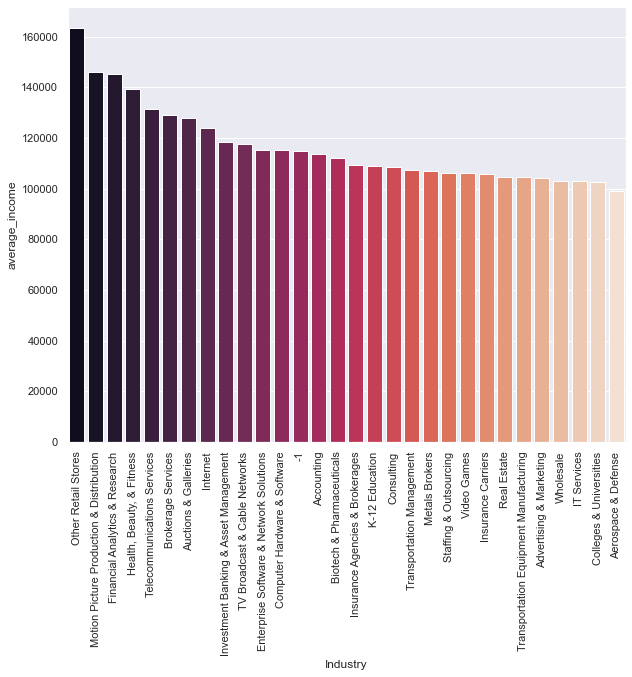

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
plot_industry=sns.barplot(x='Industry',y='average_income',data= sorted_industry[0:30],palette='rocket')
plot_industry.set_xticklabels(plot_industry.get_xticklabels(),rotation = 90)

In [ ]:
skillset = glassdoor_data.loc[glassdoor_data['Jobs_Rephrases']=='Data Scientist',['Jobs_Rephrases','Python','R_Studio','AWS','Spark','Excel']]
skills_new = skillset.groupby(['Jobs_Rephrases'])[['Python','R_Studio','AWS','Spark','Excel']].sum()


Text(0, 0.5, 'Jobs')

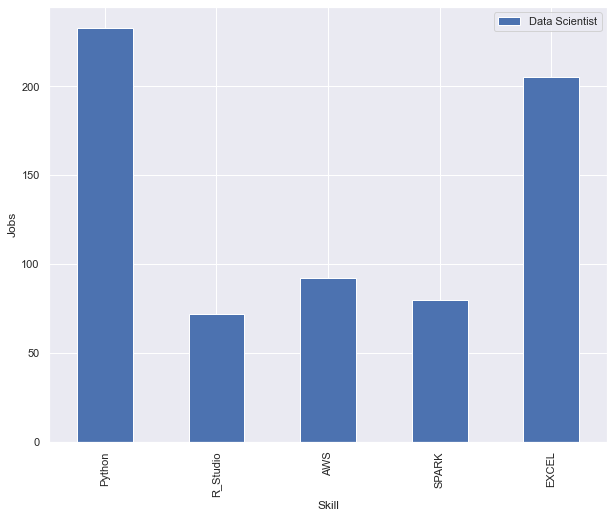

In [ ]:
transposed_data= skills_new.T
skills_final=transposed_data.reset_index()
skills_plot=skills_final.plot.bar(x='index', y='Data Scientist')
skills_plot.set_xlabel("Skill")
skills_plot.set_ylabel("Jobs")

In [ ]:
overall_skillset = glassdoor_data[['Jobs_Rephrases','Python','R_Studio','AWS','Spark','Excel']]
overall_skills_new = overall_skillset.groupby(['Jobs_Rephrases'])[['Python','R_Studio','AWS','Spark','Excel']].sum()
transposed_skills_data= overall_skills_new.T
overall_skills_final=transposed_skills_data.reset_index()
overall_skills_final



Jobs_Rephrases,index,Data Analyst,Data Engineer,Data Scientist,Director,Machine Learning Engineer,Manager,Other
0,Python,30,77,216,8,18,6,37
1,R_Studio,9,1,69,2,0,4,10
2,AWS,10,56,76,6,6,2,20
3,Spark,6,64,80,3,4,1,9
4,Excel,76,51,138,8,7,16,92
